# <font color=blue> Machine Learning model deployment with Flask framework on Railway.app</font>

### Objective:
1. To build a Machine learning classification model to classify the different species of the flowers.
2. Deploy the machine learning model with flask framework on Railway.app.

### Dataset Information:
#### Dataset source: https://www.kaggle.com/datasets/uciml/iris

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

### Understanding API

- Communication gateway between two applications (softwares)
- Can be thought of as an access point of an application for performing specific operations.

### Need of APIs
- To serve various business specific requirements.
- Serve as broker to provide capabilities of one system to other system/s.
- It allows to create distributed systems.
- It reduces retask which is already available as an API.

### Virtual environment
- A virtual environment is a tool that helps to keep dependencies required by different projects separate by creating isolated python virtual environments for them.
- Helps to create isolation of environment needed to run python applications. 
- Each project can have its own set of dependencies regardless of the other projects.

### Flask
- Flask as micro web framework written in Python.
- It has no database abstraction layer, form validation, or any other components where pre-existing third-party libraries provide common functions.

### Some of the most important features of flask are mentioned below:
- Development server and debugger
- Integrated unit testing
- Request dispatching (RESTful APIs)
- Jinja templates
- Secure cookies
- Google App Engine


### Real World applications of Flask API's
- Development of Web Applications
- Development of Machine Learning applications.
- Web pages, blogs.
- Commerical websites.
- Netflix uses Flask API's to bind all of the previous segments together.

### About Railway.app

- Railway is a deployment platform where you can provision infrastructure, develop with that infrastructure locally, and then deploy to the cloud.

- Railway.app is inspired by Heroku and is built with the aim of making app development tools easier to access for developers.

- You can select your own choice of database, i.e., MySQL, Redis, or Postgres, whichever you think is the best for your project.

- There are a ton of templates available, meaning you can either build your app from scratch or select one of the templates and build on top of that.

- For deploying an app on Railway, you will need a GitHub account. The user interface is simple and allows developers to make queries and add database tables in web form.

- While it is heavily inspired by Heroku, it takes its own take on PaaS deployments and offers features like bulk importing environmental variables and deploy previews, etc.

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [ ]:
# If using Google Colab

#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
#df.head()

In [4]:
df = pd.read_csv('D://Iris.csv')
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
24,25,4.8,3.4,1.9,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
8,9,4.4,2.9,1.4,0.2,Iris-setosa
102,103,7.1,3.0,5.9,2.1,Iris-virginica


In [ ]:
## check the shape 
df.shape

(150, 6)

In [5]:
## check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
## dropping redundant columns
df.drop('Id',axis=1,inplace=True)

### Separate the target and independent features.

In [7]:
## separate target and independent variables
X = df.drop('Species',axis=1)
y = df['Species']

### Split the data into train and test

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(105, 4) (45, 4)
(105,) (45,)


### Model Building

In [12]:
## Let us build simple random forest classifier model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
## Let us check the accuracy to see hows our model is performing

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print('accuracy train:',accuracy_train)
print('accuarcy test',accuracy_test)

accuracy train: 1.0
accuarcy test 0.9777777777777777


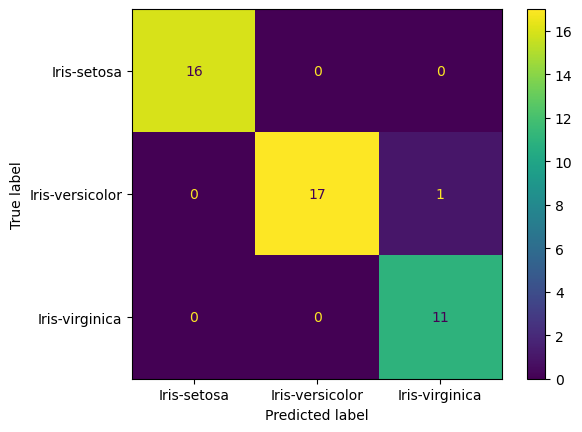

In [16]:
## Confusion matrix using test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

- As we can observe that the model is performing very good.
- From the confusion matrix we can see that there is only one misclassification.

### Pickling - Creating a pickle file with an extension as .pkl

In [ ]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

### Machine Learning Model Deployment with Flask framework on https://railway.app/

#### Now open a `new folder/new project` in `visual studio/pycharm` that should contain the `"Templates"`, `"Static"` folder and the `"model.pkl"` file *make sure you are using a virutal environment and install required packages.*

#### Lets create a basic HTML form for our frontend

Create a file **index.html** in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html >
<head>
  <meta charset="UTF-8">
  <title>ML Deployment</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
  
</head>
<body>
 <div class="login">
	<h1>Iris Flower Species Classifier</h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}"method="post">
    	 
    	<input type="text" name="sepal_length" placeholder="Sepal Length (cm)" required="required" />
        <input type="text" name="sepal_width" placeholder="Sepal Width (cm)" required="required" />
		<input type="text" name="petal_length" placeholder="Petal Length (cm)" required="required" />
		<input type="text" name="petal_width" placeholder="Petal Width (cm)" required="required" />

        <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
    </form>

   <br>
   <br>
   {{ prediction_text }}
 </div>
</body>
</html>

#### Lets create a basic css file for our front page

Create a file **style.css** in the static folder and copy the following code.

In [ ]:
@import url(https://fonts.googleapis.com/css?family=Open+Sans);
.btn { display: inline-block; *display: inline; *zoom: 1; padding: 4px 10px 4px; margin-bottom: 0; font-size: 13px; line-height: 18px; color: #333333; text-align: center;text-shadow: 0 1px 1px rgba(255, 255, 255, 0.75); vertical-align: middle; background-color: #f5f5f5; background-image: -moz-linear-gradient(top, #ffffff, #e6e6e6); background-image: -ms-linear-gradient(top, #ffffff, #e6e6e6); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#ffffff), to(#e6e6e6)); background-image: -webkit-linear-gradient(top, #ffffff, #e6e6e6); background-image: -o-linear-gradient(top, #ffffff, #e6e6e6); background-image: linear-gradient(top, #ffffff, #e6e6e6); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#ffffff, endColorstr=#e6e6e6, GradientType=0); border-color: #e6e6e6 #e6e6e6 #e6e6e6; border-color: rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.25); border: 1px solid #e6e6e6; -webkit-border-radius: 4px; -moz-border-radius: 4px; border-radius: 4px; -webkit-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); -moz-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); cursor: pointer; *margin-left: .3em; }
.btn:hover, .btn:active, .btn.active, .btn.disabled, .btn[disabled] { background-color: #e6e6e6; }
.btn-large { padding: 9px 14px; font-size: 15px; line-height: normal; -webkit-border-radius: 5px; -moz-border-radius: 5px; border-radius: 5px; }
.btn:hover { color: #333333; text-decoration: none; background-color: #e6e6e6; background-position: 0 -15px; -webkit-transition: background-position 0.1s linear; -moz-transition: background-position 0.1s linear; -ms-transition: background-position 0.1s linear; -o-transition: background-position 0.1s linear; transition: background-position 0.1s linear; }
.btn-primary, .btn-primary:hover { text-shadow: 0 -1px 0 rgba(0, 0, 0, 0.25); color: #ffffff; }
.btn-primary.active { color: rgba(255, 255, 255, 0.75); }
.btn-primary { background-color: #4a77d4; background-image: -moz-linear-gradient(top, #6eb6de, #4a77d4); background-image: -ms-linear-gradient(top, #6eb6de, #4a77d4); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#6eb6de), to(#4a77d4)); background-image: -webkit-linear-gradient(top, #6eb6de, #4a77d4); background-image: -o-linear-gradient(top, #6eb6de, #4a77d4); background-image: linear-gradient(top, #6eb6de, #4a77d4); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#6eb6de, endColorstr=#4a77d4, GradientType=0);  border: 1px solid #3762bc; text-shadow: 1px 1px 1px rgba(0,0,0,0.4); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.5); }
.btn-primary:hover, .btn-primary:active, .btn-primary.active, .btn-primary.disabled, .btn-primary[disabled] { filter: none; background-color: #4a77d4; }
.btn-block { width: 100%; display:block; }

* { -webkit-box-sizing:border-box; -moz-box-sizing:border-box; -ms-box-sizing:border-box; -o-box-sizing:border-box; box-sizing:border-box; }

html { width: 100%; height:100%; overflow:hidden; }

body { 
	width: 100%;
	height:100%;
	font-family: 'Open Sans', sans-serif;
	background: #092756;
	color: #fff;
	font-size: 18px;
	text-align:center;
	letter-spacing:1.2px;
	background: -moz-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%),-moz-linear-gradient(top,  rgba(57,173,219,.25) 0%, rgba(42,60,87,.4) 100%), -moz-linear-gradient(-45deg,  #670d10 0%, #092756 100%);
	background: -webkit-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -webkit-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -webkit-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -o-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -o-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -o-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -ms-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -ms-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -ms-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -webkit-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), linear-gradient(to bottom,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), linear-gradient(135deg,  #670d10 0%,#092756 100%);
	filter: progid:DXImageTransform.Microsoft.gradient( startColorstr='#3E1D6D', endColorstr='#092756',GradientType=1 );

}
.login { 
	position: absolute;
	top: 40%;
	left: 50%;
	margin: -150px 0 0 -150px;
	width:400px;
	height:400px;
}

.login h1 { color: #fff; text-shadow: 0 0 10px rgba(0,0,0,0.3); letter-spacing:1px; text-align:center; }

input { 
	width: 100%; 
	margin-bottom: 10px; 
	background: rgba(0,0,0,0.3);
	border: none;
	outline: none;
	padding: 10px;
	font-size: 13px;
	color: #fff;
	text-shadow: 1px 1px 1px rgba(0,0,0,0.3);
	border: 1px solid rgba(0,0,0,0.3);
	border-radius: 4px;
	box-shadow: inset 0 -5px 45px rgba(100,100,100,0.2), 0 1px 1px rgba(255,255,255,0.2);
	-webkit-transition: box-shadow .5s ease;
	-moz-transition: box-shadow .5s ease;
	-o-transition: box-shadow .5s ease;
	-ms-transition: box-shadow .5s ease;
	transition: box-shadow .5s ease;
}
input:focus { box-shadow: inset 0 -5px 45px rgba(100,100,100,0.4), 0 1px 1px rgba(255,255,255,0.2); }

Create a file **app.py** and copy the following code

In [ ]:
# importing necessary libraries and functions
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle

app = Flask(__name__) #Initialize the flask App
model = pickle.load(open('model.pkl', 'rb')) # loading the trained model

@app.route('/') # Homepage
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    # retrieving values from form
    input_features = [float(x) for x in request.form.values()]
    final_features = [np.array(input_features)]
    prediction = model.predict(final_features) # making prediction
    return render_template('index.html', prediction_text='Predicted Class: {}'.format(prediction)) # rendering the predicted result

if __name__ == "__main__":
    app.run(debug=True)

### Deployment of the Application on Railway.app

### Setup

### Github: 
- Create a new githib repository and upload your project into the repository.

### Lets deploy our application on Railway.app

#### Above we performed the following steps:
- Created a newfolder/new project in vscode/pycharm.
- Created virtual environment and installed the required packages.
- Created templates, static, app.py (once the app is running in your local machine, lets proceed with deployment)

#### Some Important files needs to be created before going for the deployment steps.

- Create a Procfile (Procfile is a mechanism for declaring what commands are run by your application’s dynos on the platform.)
    - <font color=blue>**echo web: >Procfile**</font> (creates a procfile)
    - `web: gunicorn  app:app`(paste this in the procfile)
                         
                  
- Create a runtime.txt file (need to tell what type of python need to be used)
   - `python-3.10.5` (pass your version of the python in the file)
       
       
- Create a requirements.txt file
   - <font color=blue>**pip freeze >requirements.txt**</font>


#### Follow the below steps to deploy your application on Railway.app
- First we need to Signup to Railway.app using you Google account/Github account and verify your account using you Github account.
    - <font color=blue>**https://railway.app/**</font>.
    
    
- Create a Railway project and deploy the application
    - <font color=blue>**Create a project by clicking on "Start a new project"**</font>
    - <font color=blue>**From the dropdown choose "deploy from github repo" and choose the project from Github**</font>
    - <font color=blue>**Once the Github project is selected click on "Deploy now"**</font> (it will take some time to deploy the application.)
    - <font color=blue>**Now application is deployed. Under the "Deployments" section a url will be created, navigate to the url and test your deployed application.**</font>
    
       
- sample application's url - https://mentor-casestudy-production.up.railway.app/
    

-------
## Happy Learning:)
-----